Supervised Learning Code

### Part 1: Predicting Building Energy Efficiency (Supervised Learning)
Scenario - You are working for an architecture firm, and your task is to build a model that predicts building energy efficiency rating of buildings based on features of the like wall area, roof area, overall height, etc.

In [2]:
from IPython.display import display

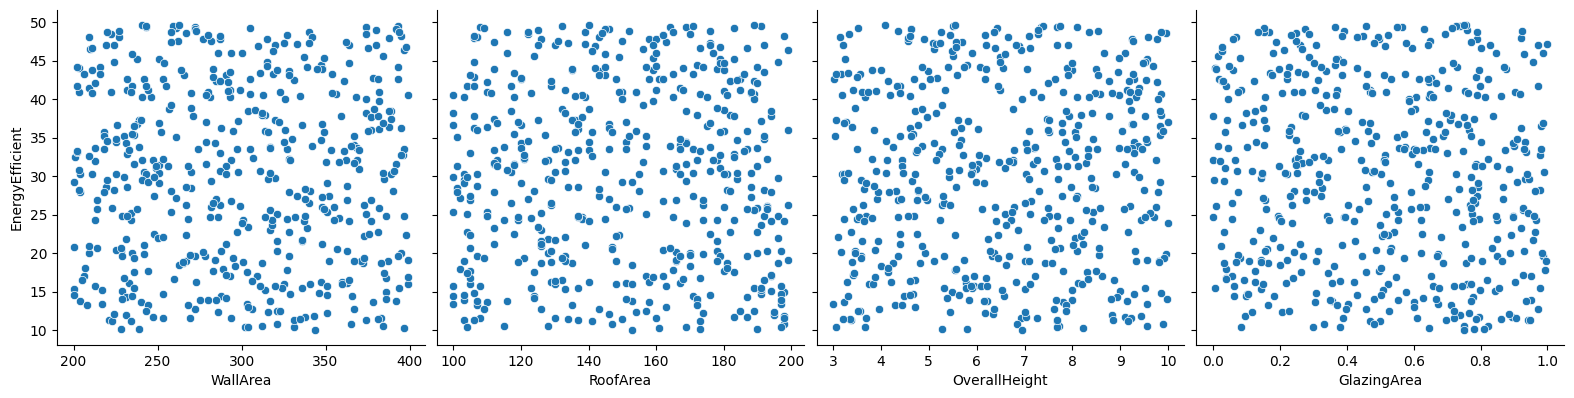

'Mean Squared Error = 131.55296442210368'

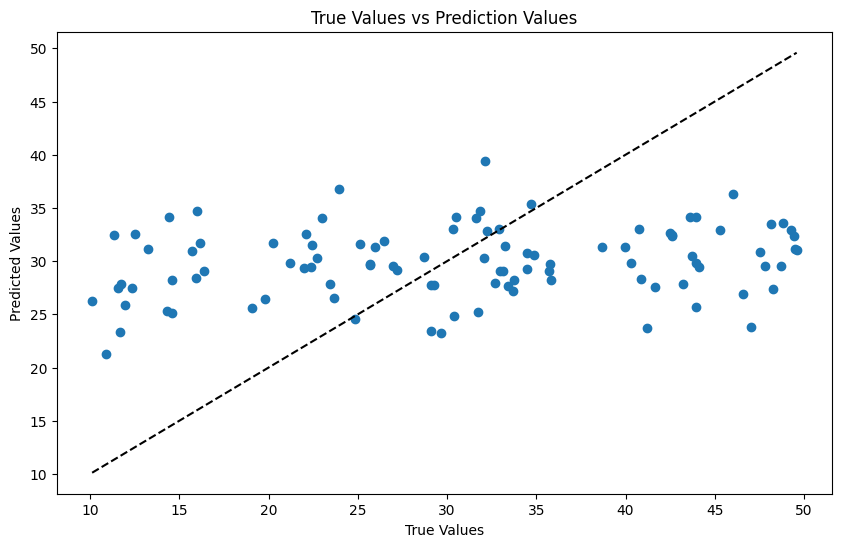

In [3]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# generate synthetic data for building features and energy efficient ratings

np.random.seed(0)
data_size = 500

data = {
    'WallArea' : np.random.randint(200, 400, data_size),
    'RoofArea' : np.random.randint(100, 200, data_size),
    'OverallHeight' : np.random.uniform(3, 10, data_size),
    'GlazingArea' : np.random.uniform(0, 1, data_size),
    'EnergyEfficient' : np.random.uniform(10, 50, data_size),
}

df = pd.DataFrame(data)

# data preprocessing
X = df.drop('EnergyEfficient', axis=1)
y = df['EnergyEfficient']

# visualize the relationships between features and the target variable (EnergyEfficient)
sns.pairplot(
    df, 
    x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], 
    y_vars='EnergyEfficient', 
    height=4,
    aspect=1,
    kind='scatter'
    )
plt.show()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# make predictions
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
display(f'Mean Squared Error = {mse}')

# plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Prediction Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

### Part 2: Vehicle Clustering (Unsupervised Learning)
Scenario - You are working for an automotive company, and your task is to cluster vehicle into groups based on features such as weight, engine size, and horsepower.

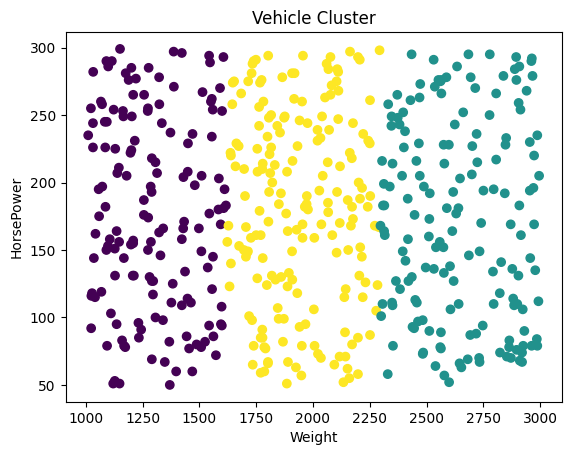

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# generate dataset for vehicles
np.random.seed(0)

data_size = 500

data = {
    'Weight' : np.random.randint(1000, 3000, data_size),
    'EngineSize' : np.random.uniform(1, 4, data_size),
    'HorsePower' : np.random.randint(50, 300, data_size),
}
df = pd.DataFrame(data)

# no labels are needed for unsupervised learning
X = df

# perform kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# plotting the cluster
plt.scatter(df['Weight'], df['HorsePower'], c=kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('HorsePower')  
plt.title('Vehicle Cluster')
plt.show()

